In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import sys
from pathlib import Path
ROOT_DIR = os.path.abspath(os.path.join(Path().absolute(), os.pardir, os.pardir))
sys.path.insert(1, ROOT_DIR)
DIR_PATH = os.path.join(ROOT_DIR, 'research', 'calibration')

In [ ]:
from glob import glob
import numpy as np
import scipy
import matplotlib.pyplot as plt
from frequency_response import FrequencyResponse

In [ ]:
def diff_plot(fr1, fr2, fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots()
        fig.set_size_inches(12, 8)
    diff = FrequencyResponse(name='Difference', frequency=fr1.frequency.copy(), raw=fr1.raw-fr2.raw)
    fr1.plot_graph(fig=fig, ax=ax, show=False, raw_plot_kwargs={'color': 'C0', 'label': fr1.name})
    fr2.plot_graph(fig=fig, ax=ax, show=False, raw_plot_kwargs={'color': 'C1', 'label': fr2.name})
    diff.plot_graph(fig=fig, ax=ax, show=False, raw_plot_kwargs={'color': 'C3', 'label': 'Difference'})
    ax.set_title(f'{fr1.name} vs {fr2.name}')
    return fig, ax

In [ ]:
from biquad import digital_coeffs, low_shelf
def bass_shelf(f, gain, fc=105.0, q=0.71, fs=48000):
    fs = 48000
    a0, a1, a2, b0, b1, b2 = low_shelf(fc, 0.71, gain, fs=fs)
    shelf = digital_coeffs(f, fs, a0, a1, a2, b0, b1, b2)
    return shelf

In [145]:
def create_target_with_bass_shelf(db_dir_name, target_file_name, target_name, bass_boost):
    fr = FrequencyResponse.read_from_csv(os.path.join(ROOT_DIR, 'measurements', db_dir_name, 'resources', f'{target_file_name}_wo_bass.csv'))
    shelf = bass_shelf(fr.frequency, bass_boost)
    fr.raw += shelf
    fr.name = target_name

    fr.write_to_csv(os.path.join(ROOT_DIR, 'measurements', db_dir_name, 'resources', f'{target_file_name}.csv'))
    fr.plot_graph(show=False, color='C0', file_path=os.path.join(ROOT_DIR, 'measurements', db_dir_name, 'resources', f'{target_file_name}.png'))
    return fr

## Calibrated Harman Targets with Bass Shelf

In [ ]:
rtings_harman_oe = create_target_with_bass_shelf('rtings', 'rtings_harman_over-ear_2018', 'Rtings Harman over-ear 2018', 6)
rtings_harman_ie = create_target_with_bass_shelf('rtings', 'rtings_harman_in-ear_2019v2', 'Rtings Harman in-ear 2019', 9)

if_harman_oe = create_target_with_bass_shelf('innerfidelity', 'innerfidelity_harman_over-ear_2018', 'Innerfidelity Harman over-ear 2018', 6)
if_harman_ie = create_target_with_bass_shelf('innerfidelity', 'innerfidelity_harman_in-ear_2019v2', 'Innerfidelity Harman in-ear 2019', 9)

hp_harman_oe = create_target_with_bass_shelf('headphonecom', 'headphonecom_harman_over-ear_2018', 'Headphone.com Harman over-ear 2018', 6)
hp_harman_ie = create_target_with_bass_shelf('headphonecom', 'headphonecom_harman_in-ear_2019v2', 'Headphone.com Harman in-ear 2019', 9)

crinacle_harman_oe = create_target_with_bass_shelf('crinacle', 'crinacle_harman_over-ear_2018', 'Crinacle Harman over-ear 2018', 6)

raa_hdmx_harman_oe = create_target_with_bass_shelf('referenceaudioanalyzer', 'referenceaudioanalyzer_hdm-x_harman_over-ear_2018', 'Reference Audio Analyzer HDM-X Harman over-ear 2018', 6)
raa_hdm1_harman_oe = create_target_with_bass_shelf('referenceaudioanalyzer', 'referenceaudioanalyzer_hdm1_harman_over-ear_2018', 'Reference Audio Analyzer HDM1 Harman over-ear 2018', 6)
raa_siec_harman_ie = create_target_with_bass_shelf('referenceaudioanalyzer', 'referenceaudioanalyzer_siec_harman_in-ear_2019v2', 'Reference Audio Analyzer SIEC Harman in-ear 2019', 9)

## Rtings Calibrated Harman Targets vs Native Targets

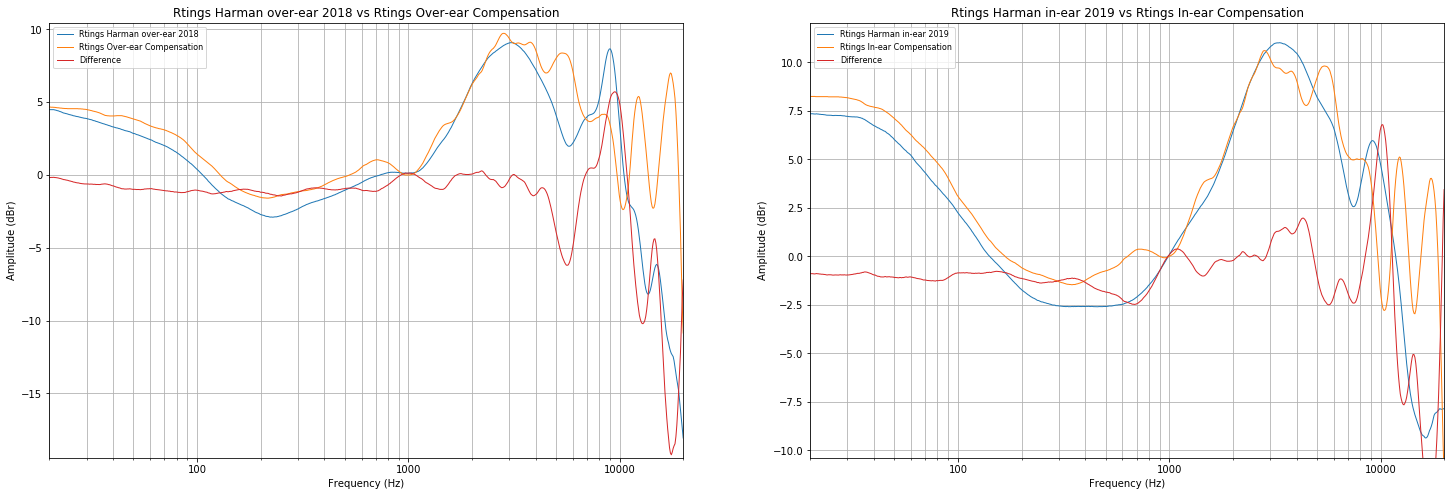

In [153]:
rtings_oe = FrequencyResponse.read_from_csv(os.path.join(ROOT_DIR, 'measurements', 'rtings', 'resources', 'rtings_compensation_w_bass.csv'))
rtings_oe.name = 'Rtings Over-ear Compensation'
rtings_ie = FrequencyResponse.read_from_csv(os.path.join(ROOT_DIR, 'measurements', 'rtings', 'resources', 'rtings_inear_compensation_w_bass.csv'))
rtings_ie.name = 'Rtings In-ear Compensation'

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(25, 8)
diff_plot(rtings_harman_oe, rtings_oe, fig=fig, ax=axs[0])
diff_plot(rtings_harman_ie, rtings_ie, fig=fig, ax=axs[1])
fig.savefig(os.path.join(DIR_PATH, 'Rtings Harman vs Native.png'))
plt.show()

## Innerfidelity vs Rtings vs Headphone.com

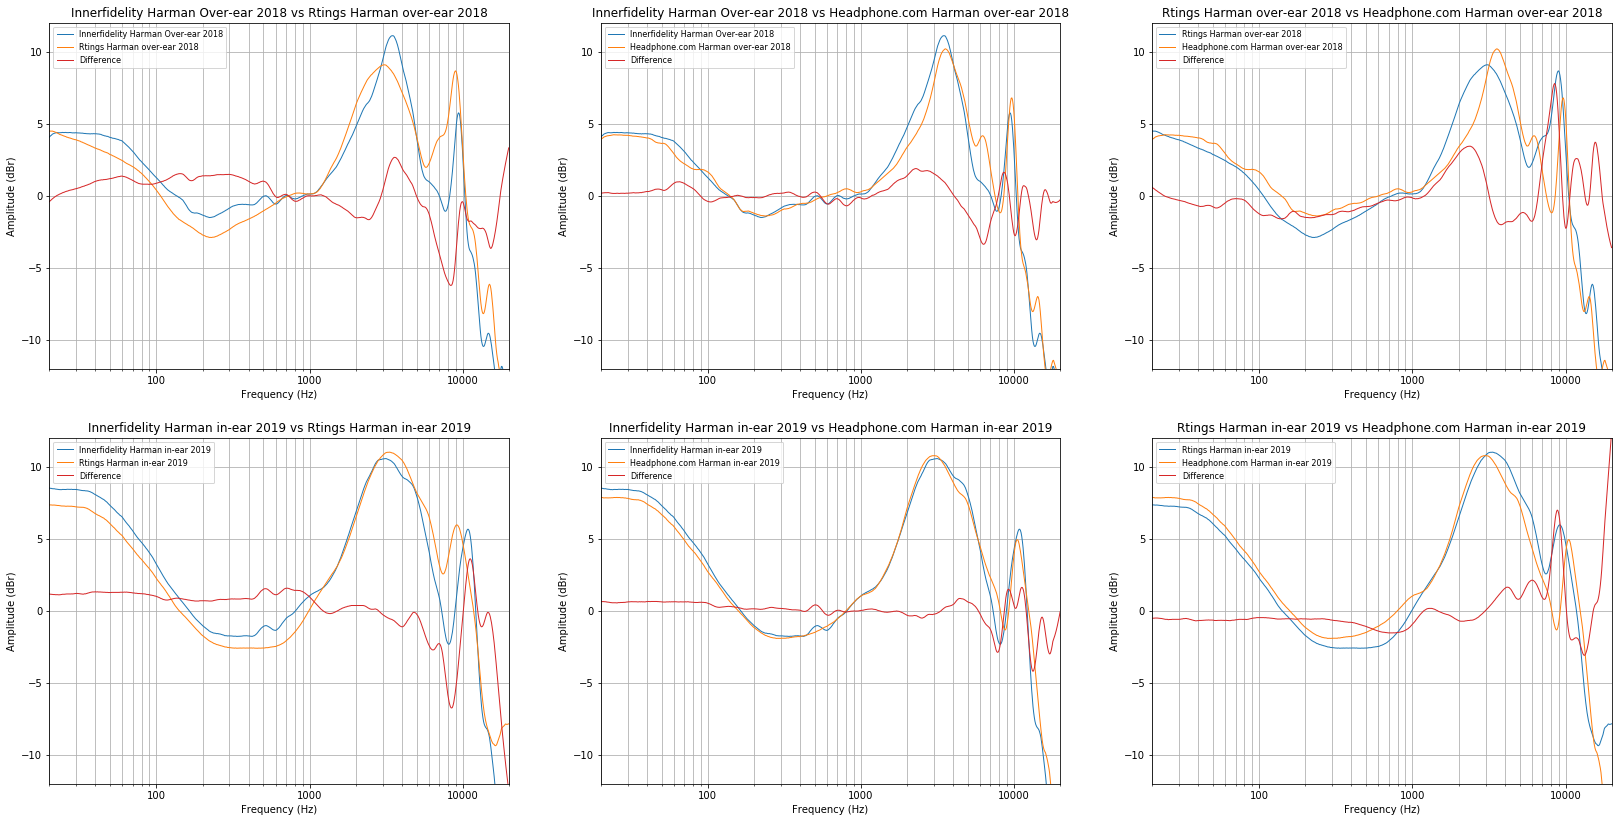

In [150]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(28, 14)
diff_plot(if_harman_oe, rtings_harman_oe, fig=fig, ax=axs[0, 0])
diff_plot(if_harman_oe, hp_harman_oe, fig=fig, ax=axs[0, 1])
diff_plot(rtings_harman_oe, hp_harman_oe, fig=fig, ax=axs[0, 2])
diff_plot(if_harman_ie, rtings_harman_ie, fig=fig, ax=axs[1, 0])
diff_plot(if_harman_ie, hp_harman_ie, fig=fig, ax=axs[1, 1])
diff_plot(rtings_harman_ie, hp_harman_ie, fig=fig, ax=axs[1, 2])
for row in axs:
    for ax in row:
        ax.set_ylim([-12, 12])
fig.savefig(os.path.join(DIR_PATH, 'Innerfidelity vs Rtings vs Headphone.com Diff.png'))
plt.show()

## Crinacle vs Innerfidelity
Crinacle's over-ear target compared against Innerfidelity's over-ear target.

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e816c35988>)

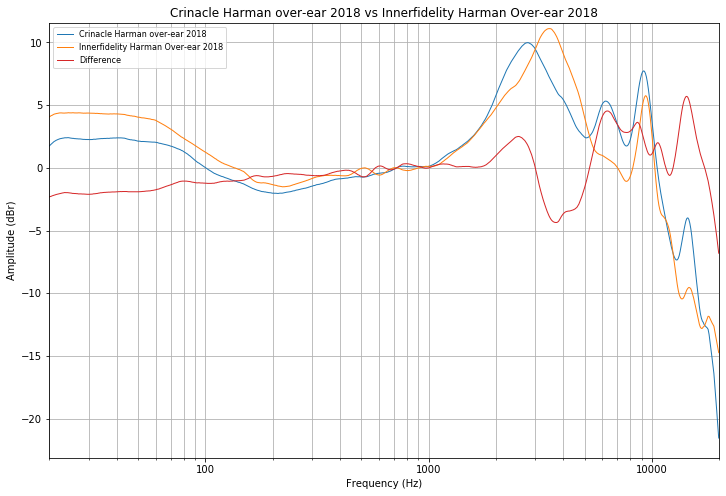

In [151]:
diff_plot(crinacle_harman_oe, if_harman_oe)